In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib
import matplotlib.pyplot as plt
import ronan
import pandas as pd
import os
import PIL

In [2]:
path = '../../../data/kaggle/painter-by-numbers/'

In [3]:
data = ronan.load_painting_datasets(assemble_images=ronan.image_pair)

DEBUG:ronan:building labeled pairs dataset
DEBUG:ronan:labeled pairs dataset: len 1000544
DEBUG:ronan:building train, validation split
DEBUG:ronan:building unlabeled image pair dataset
DEBUG:ronan:done building dataset


In [4]:
len(data.labeled_pairs.pairs.label), data.labeled_pairs.pairs.label.sum()

(1000544, 501477)

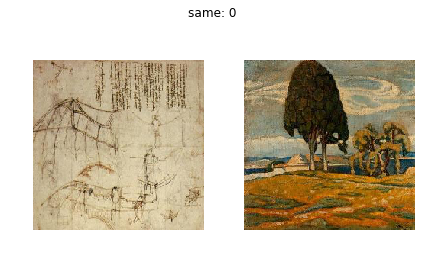

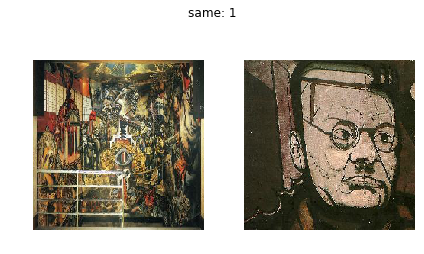

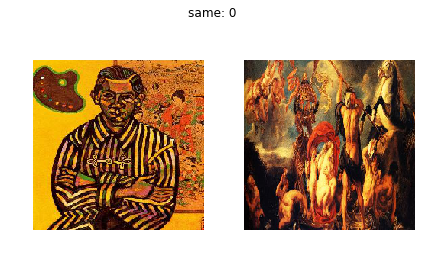

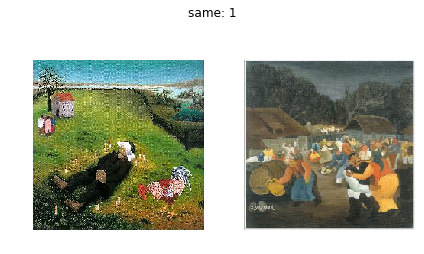

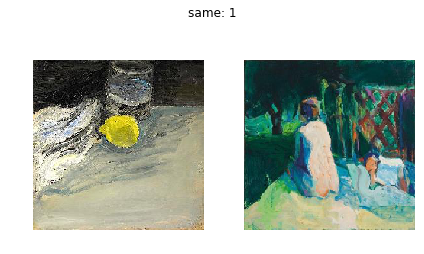

In [10]:
for i in range(5):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(data.train[i][0][0].transpose(1, 2, 0)/255.)
    ax2.imshow(data.train[i][0][1].transpose(1, 2, 0)/255.)
    fig.suptitle("same: {}".format(data.train[i][1]))
    ax1.axis('off')
    ax2.axis('off')
    fig.tight_layout()

In [17]:
data.train[0][0].shape

(3, 224, 224)

In [18]:
type(data.train[0][1])

numpy.int32

In [19]:
len(data.train), len(data.validation)

(700380, 300164)

In [11]:
data_1M = ronan.load_painting_datasets(assemble_images=ronan.image_pair, size=1000000)
data_1k = ronan.load_painting_datasets(assemble_images=ronan.image_pair, size=1000)

DEBUG:ronan:building labeled pairs dataset
DEBUG:ronan:labeled pairs dataset: len 1000544
DEBUG:ronan:building train, validation split
DEBUG:ronan:building unlabeled image pair dataset
DEBUG:ronan:done building dataset
DEBUG:ronan:building labeled pairs dataset
DEBUG:ronan:labeled pairs dataset: len 2084
DEBUG:ronan:building train, validation split
DEBUG:ronan:building unlabeled image pair dataset
DEBUG:ronan:done building dataset


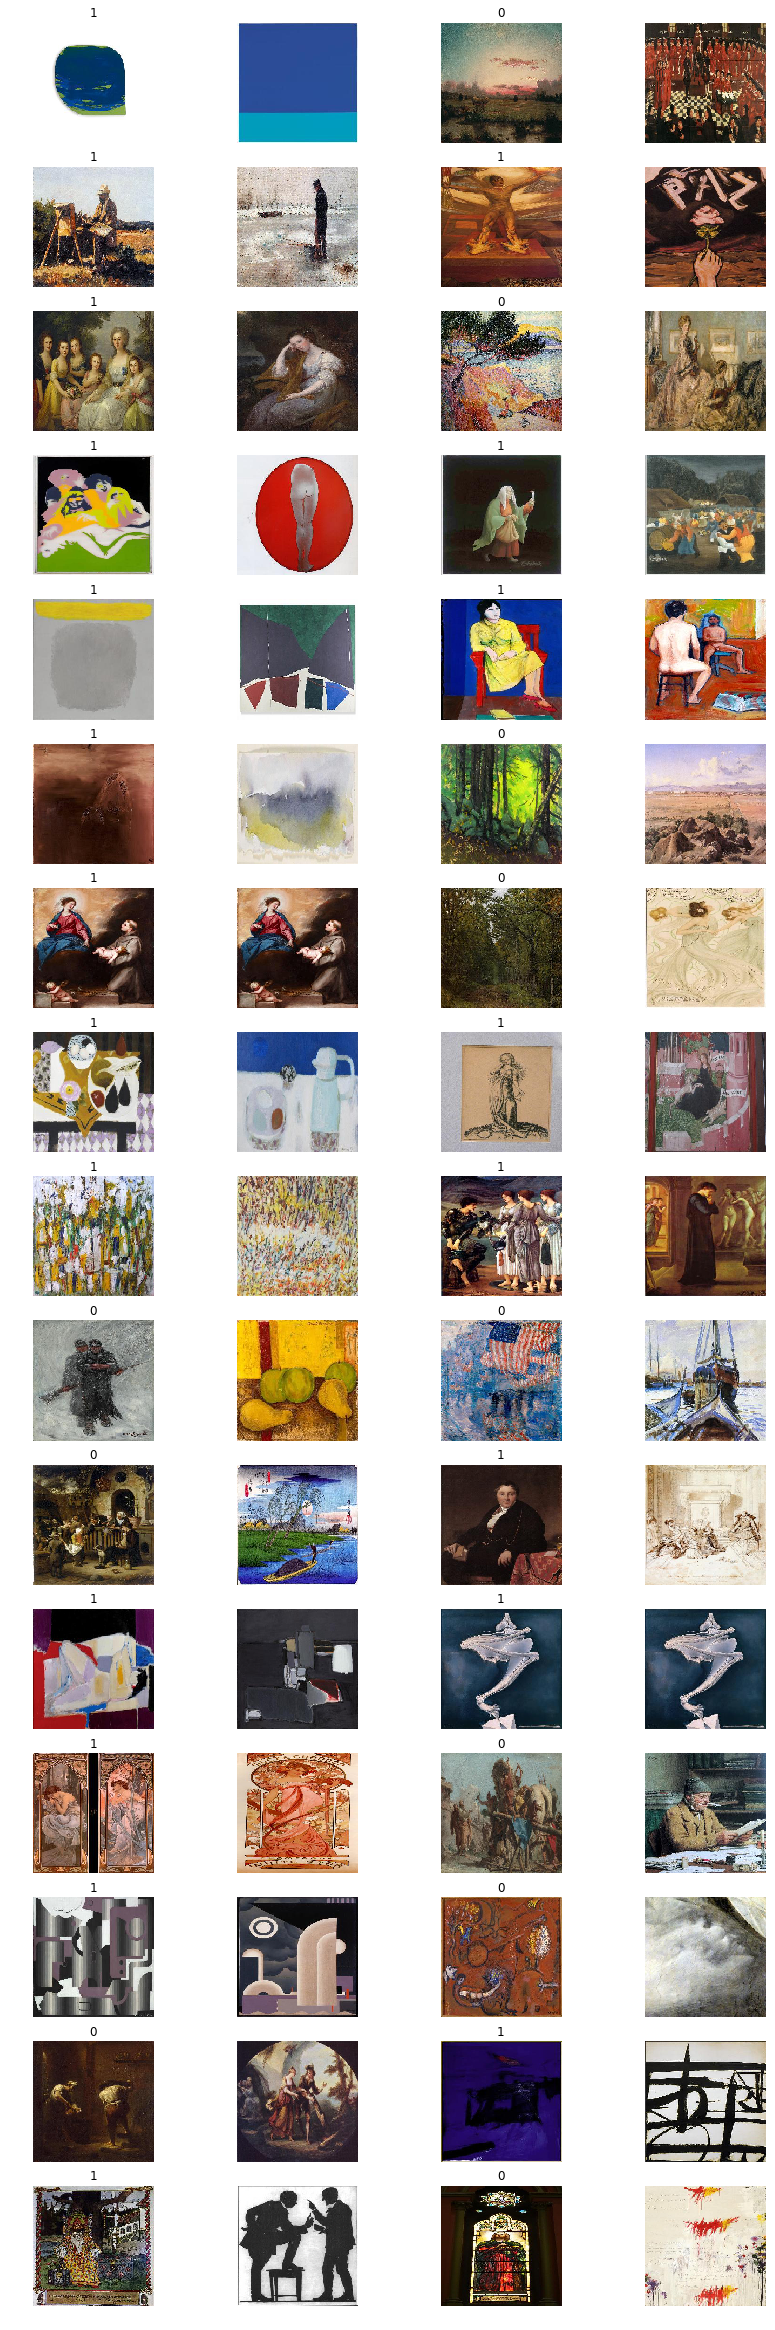

In [17]:
batch = 16
fig, axes = plt.subplots(batch, 4, figsize=(14, 42))
for i in range(batch):
    for j in range(4):
        axes[i,j].axis('off')
    for j in [0, 1]:
        axes[i, j].imshow(data_1k.train[i][0][j].transpose(1, 2, 0)/255.)
    axes[i, 0].set_title(str(data_1k.train[i][1]))
    for j in [0, 1]:
        axes[i, 2+j].imshow(data_1M.train[i][0][j].transpose(1, 2, 0)/255.)
    axes[i, 2].set_title(str(data_1M.train[i][1]))

In [19]:
for data in [data_1k, data_1M]:
    print(len(data.labeled_pairs.pairs.label), data.labeled_pairs.pairs.label.sum())

(2084, 1585)
(1000544, 501451)


In [ ]:
# conclusion: data_1k has 3/4 same artist, it is easy to do 75% accuracy!